# Homogeneity Test (Python) for Time Series Data

### 1.0 Author: Muhammad Arif Ghouri
> Submission Date: \
> Contact Info: 
> - Email:
> - GitHub:
> - Kaggle:
> - LinkedIn:
> - Twitter:
> - Medium:


### 2.0 About Data
- Data is about Daily Female Births in Califonia 1959
- Data is Used in this Study available online @ [raw.githubusercontent.com](https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-total-female-births.csv)



### 2.1 Task 

We intend to conduct an Analysis on the given dataset to find if there is a shift in mean in time series. During the coding process, we will document our observations. Ultimately, we will produce a summary and draw conclusions from our findings

### 2.2 Objective
To test the homogenity of Data,we incorporate different test's and their codes as snippet to perform such tasks easily.

#### 2.2.1 Background

The homogeneity test is a statistical test method, that checks if two (or more) datasets come from the same distribution or not. 

>In a time series, the homogeneity test is applied to detect one (or more) change/breakpoint in the series.\ This breakpoint occurs where the data set changes its distribution. 

>NOTE\
>Lots of statistical analyses require a homogenous dataset. That's why it is an important test in statistical analysis.

#### 2.2.2 Function details

All Homogeneity test functions have almost similar input parameters.\
These are:
##### INPUTS
x: a vector (list, numpy array or pandas series) data\
alpha: significance level (default 0.05)\
sim: No. of monte carlo simulation for p-value calculation. (default 20000)\


##### OUTPUTS
And all Homogeneity tests return a named tuple which contained:

h: True (if data is nonhomogeneous) or False (if data is homogeneous)\
cp: probable change point location\
p: p value of the significance test\
U/T/Q/R/V: test statistics which depends on the test method\
avg: mean values at before and after the change point

#### 2.2.3 Tests for Homogeneity check
pyHomogeneity is a pure Python implementation for the homogeneity test.

There are several tests available to check the homogeneity of a time series. pyHomogeneity package can perform six commonly used Homogeneity test listed below:

- Pettitt's test (pettitt_test)

- Standard Normal Homogeinity Test (SNHT) Test (snht_test)
  
- Buishand's Q Test (buishand_q_test)

- Buishand's Range Test (buishand_range_test):

- Buishand's Likelihood Ration Test (buishand_likelihood_ratio_test)

- Buishand's U Test (buishand_u_test)

### 3.0 Importing Essential python Libraries

In [1]:
import numpy as np
import pandas as pd
import pyhomogeneity as hg
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline

### 4.0 Data Loading & Data Exploration

In [28]:
# Load data from a csv file
Birth_data = pd.read_csv("./data/daily-total-female-births.csv")
Birth_data.index = pd.to_datetime(Birth_data.Date, format='%Y-%m-%d')# Set the index as the date
Birth_data.drop('Date', axis=1,inplace=True) # Drop the extra date column

In [29]:
Birth_data.head()

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [30]:
Birth_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 1959-01-01 to 1959-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Births  365 non-null    int64
dtypes: int64(1)
memory usage: 5.7 KB


#### Note
> There is only one column found with an int64 dtype while DatetimeIndex is generated using date Column

<Axes: xlabel='Date'>

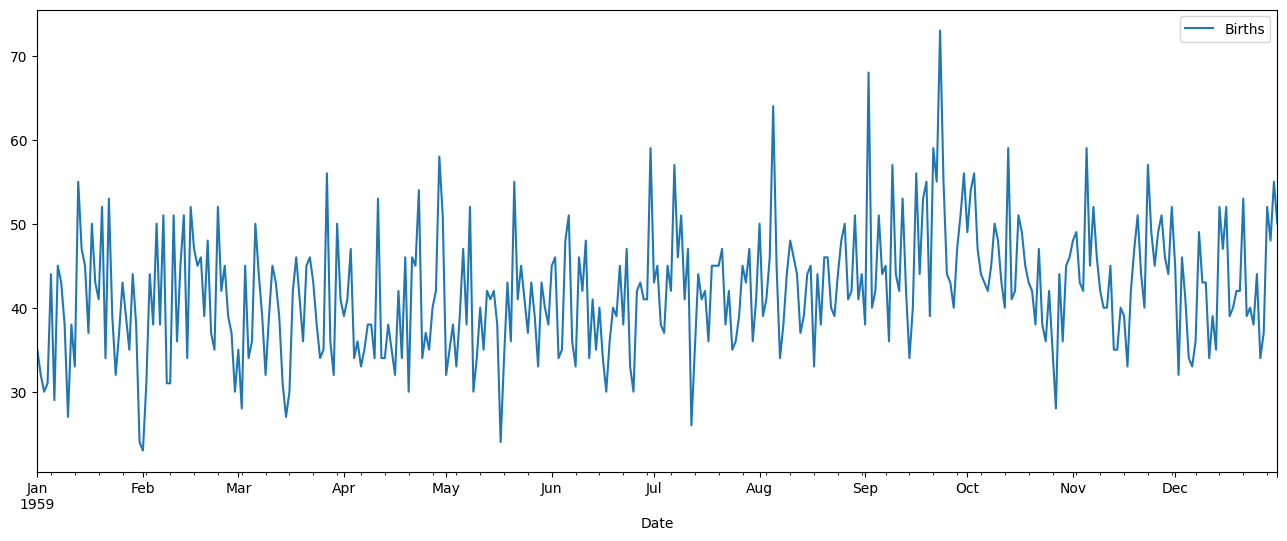

In [31]:
Birth_data.plot(figsize=(16,6))

#### Pettitt's test (pettitt_test)

In [32]:
pettitt_result = hg.pettitt_test(Birth_data, alpha=0.05)
pettitt_result

Pettitt_Test(h=True, cp='1959-06-29', p=0.0, U=12088.0, avg=mean(mu1=39.638888888888886, mu2=44.25945945945946))

#### NOTE
> h=True : The Hypothesis is true that theres a difference in means of data sides of @ cp(cut off point)\
> cp: cut off point\
> p: p-value which elaborates as <0.05 have true evidence of study\
> mu1: mean before cp\
> mu2: mean after cp

#### Standard Normal Homogeinity Test (SNHT) Test (snht_test)

In [33]:
snht_result = hg.snht_test(Birth_data, sim=10000)
snht_result

SNHT_Test(h=True, cp='1959-06-29', p=0.0, T=36.072304319229644, avg=mean(mu1=39.638888888888886, mu2=44.25945945945946))

####  Buishand's Q Test (buishand_q_test)

In [34]:
buishand_result = hg.buishand_q_test(Birth_data)
buishand_result

Buishand_Q_Test(h=True, cp='1959-06-29', p=0.0, Q=3.006851193655152, avg=mean(mu1=39.638888888888886, mu2=44.25945945945946))

#### - Buishand's Range Test (buishand_range_test)

In [35]:
buishand_result = hg.buishand_range_test(Birth_data)
buishand_result

Buishand_Range_Test(h=True, cp='1959-06-29', p=0.0, R=3.006851193655152, avg=mean(mu1=39.638888888888886, mu2=44.25945945945946))

#### Buishand's Likelihood Ration Test (buishand_likelihood_ratio_test)

In [36]:
buishand_result = hg.buishand_likelihood_ratio_test(Birth_data)
buishand_result

Buishand_Likelihood_Ratio_Test(h=True, cp='1959-06-29', p=0.0, V=0.3148011072736896, avg=mean(mu1=39.638888888888886, mu2=44.25945945945946))

#### Buishand's U Test (buishand_u_test)

In [37]:
buishand_result = hg.buishand_q_test(Birth_data)
buishand_result

Buishand_Q_Test(h=True, cp='1959-06-29', p=0.0, Q=3.006851193655152, avg=mean(mu1=39.638888888888886, mu2=44.25945945945946))

#### OBSERVATION
>All homogeneity test shows that there is a significant change-point in this dataset. Because the **p-value** is smaller than **alpha=0.05** and **h=True**. The change-point is located at **1959-06-29**. The mean value of before and after change-point is  **39.638888888888886** and **44.25945945945946**.

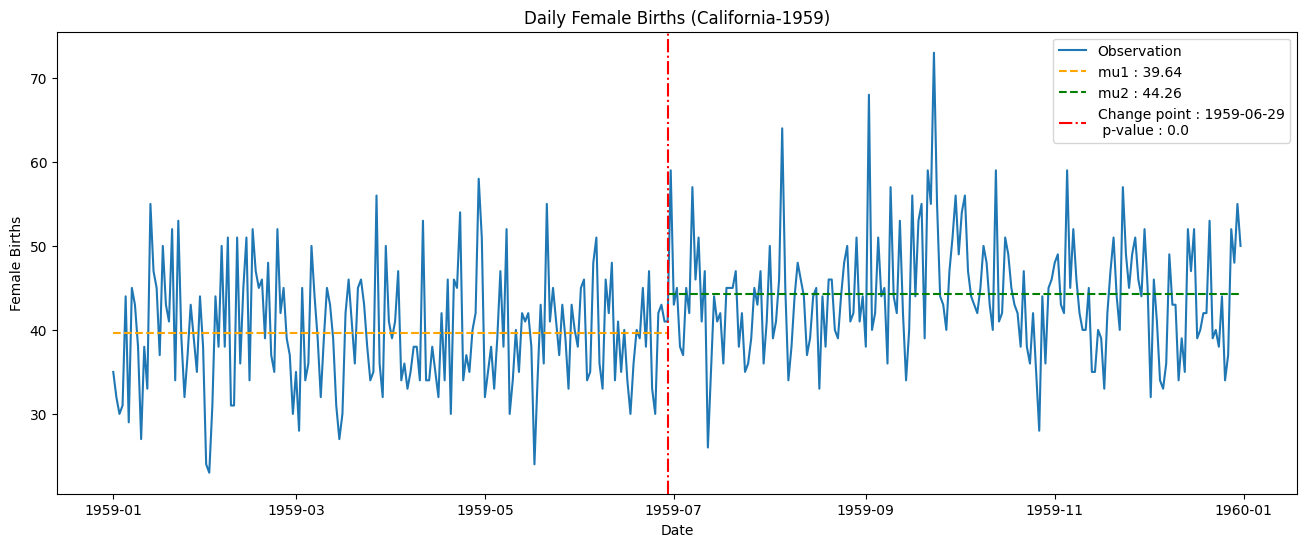

In [54]:
result = pettitt_result

min = Birth_data.index[0]
max = Birth_data.index[-1]

loc = pd.to_datetime(result.cp)
mu1 = result.avg.mu1
mu2 = result.avg.mu2

plt.figure(figsize=(16,6))
plt.plot(Birth_data, label="Observation")
plt.hlines(mu1, xmin=min, xmax=loc, linestyles='--', colors='orange',lw=1.5, label='mu1 : ' + str(round(mu1,2)))
plt.hlines(mu2, xmin=loc, xmax=max, linestyles='--', colors='g', lw=1.5, label='mu2 : ' + str(round(mu2,2)))
plt.axvline(x=loc, linestyle='-.' , color='red', lw=1.5, label='Change point : '+ loc.strftime('%Y-%m-%d') + '\n p-value : ' + str(result.p))

plt.title('Daily Female Births (California-1959)')
plt.xlabel('Date')
plt.ylabel('Female Births')
plt.legend(loc='upper right')

# plt.savefig("F:/aaaaaa.jpg", dpi=600)

### Conclusion
All test results for homogeneity check and visuals have a clear evidence of shifting of mean in a single dataset & can be divided in two groups of data 

### 5.0 Split the Data from cutting Point
> by Finding we let to know that before & after cutting point (1959-06-29) The means changes,so we consider both parts as seperate groups

In [53]:
data = Birth_data['Births'] # only extract the Births column b/c further test accepts only series
cutting_point = loc # Define the cutting point index

# Split the dataset into two datasets
fem_births_bc = data[:cutting_point] # Before the change point
fem_births_ac = data[cutting_point:] # After the change point

#### 5.1 Bartlett’s test for homogeneity (all Samples/Groups have same varience)

Assumptions
>- Before executing some statistical tests like the One-Way ANOVA, Barlett’s test ensures that the hypothesis of equal >variances is correct. 
>- It’s utilized when your data is almost certainly from a Gaussian distribution or normal distribution.


This is a hypotheses test and the two hypotheses are as follows:

>- null hypothesis:     the groups have equal variance.
>- Alternative hypothesis:  one group has a different variance compared to the others.


In [51]:
import scipy.stats as stats
# performing Bartlett's test
stat, p = stats.bartlett(fem_births_bc, fem_births_ac)
  
print("Statistics = %f, p = %f" % (stat, p))
if p > 0.05:
    print("the variances are equal across all samples/groups")
else:
     print("the variances are not equal across all samples/groups, p-value is less than .05, we reject the null hypothesis of the Bartlett's test.")


Statistics = 0.044890, p = 0.832206
the variances are equal across all samples/groups


#### 5.2 Levene’s Test for Homogenity (all Samples/Groups have same varience)

There are actually three different variations of Levene’s test you can use. The recommended usages are as follows:

> - median: (recommended for skewed distributions.)
> - mean: (recommended for symmetric, moderate-tailed distributions.)
> - trimmed: (recommended for heavy-tailed distributions.)

This is a hypotheses test and the two hypotheses are as follows:

>- null hypothesis:     the groups have equal variance.
>- Alternative hypothesis:  one group has a different variance compared to the others.


In [52]:
# performing Levene's test centered at the median
stat, p = stats.levene(fem_births_bc, fem_births_ac, center='median')
  
print("Statistics = %f, p = %f" % (stat, p))
if p > 0.05:
    print("the variances are equal across all samples/groups-median")
else:
     print("the variances are not equal across all samples/groups, p-value is less than .05, we reject the null hypothesis of the Levene's test centered at median.")


# performing Levene's test centered at the mean
stat, p = stats.levene(fem_births_bc, fem_births_ac, center='mean')
  
print("Statistics = %f, p = %f" % (stat, p))
if p > 0.05:
    print("the variances are equal across all samples/groups-mean")
else:
     print("the variances are not equal across all samples/groups, p-value is less than .05, we reject the null hypothesis of the Levene's test centered at mean.")

#trimmed: recommended for heavy-tailed distributions. which can't be test here

Statistics = 0.548154, p = 0.459550
the variances are equal across all samples/groups-median
Statistics = 0.630984, p = 0.427512
the variances are equal across all samples/groups-mean


### 6.0 Violation of Homogeneity of Variance
If your samples do not meet the assumption of equal variance
>There are two options available
>
>1. Transformation of Data
>   - reciprocal transformation
>   - log transformation
>   - square-root transformation
>2. Non-parametric Statistical Tests

> While There is no guarantee that a specific transformation will ensure your data meets the assumption of equal variance, so it is worth conducting several transformations on your data.
